In [5]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

dataframe = read_csv('mast.csv',engine='python')

In C:\Users\Afrid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Afrid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Afrid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Afrid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Afrid\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [184]:
dataframe

,Date/Time,WS_50_mean,WS_50_stdev,WS_80_mean,WS_80_stdev,WS_100_mean,WS_100_stdev,Ta_10_mean,Pbaro_5_mean,mean_ws
0,01-10-2013 10:00,5.62,0.43,5.71,0.43,5.61,0.43,27.81,1004.2,5.646667
1,01-10-2013 10:10,5.72,0.48,5.85,0.50,5.85,0.43,27.82,1004.1,5.806667
2,01-10-2013 10:20,6.00,0.36,6.05,0.46,6.05,0.37,27.76,1003.9,6.033333
3,01-10-2013 10:30,6.49,0.41,6.58,0.53,6.46,0.43,27.77,1003.9,6.510000
4,01-10-2013 10:40,6.74,0.45,6.82,0.56,6.86,0.39,27.80,1003.8,6.806667
...,...,...,...,...,...,...,...,...,...,...
104944,30-09-2015 23:00,8.76,0.64,8.14,0.74,9.01,0.57,27.46,1010.4,8.636667
104945,30-09-2015 23:10,8.60,0.61,8.28,0.68,8.84,0.61,27.31,1010.4,8.573333
104946,30-09-2015 23:30,8.48,0.66,8.26,0.60,8.66,0.58,27.22,1010.3,8.466667
104947,30-09-2015 23:40,9.39,0.81,8.96,0.75,9.51,0.90,27.19,1010.2,9.286667


In [85]:
df1 = dataframe[['Date/Time','WS_50_mean']].copy()
df1['Date/Time']= pd.to_datetime(df1['Date/Time'])
df1.set_index('Date/Time', inplace=True)
df = df1.copy()

In [185]:
series=df.iloc[13188:65748]
values = series.values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
# standardization the dataset and print the first 5 rows
normalized = scaler.transform(values)
normalized

Mean: 8.256278, StandardDeviation: 3.285037


array([[ 0.49123391],
       [ 0.49123391],
       [ 0.18986746],
       ...,
       [-0.69596727],
       [-0.75076117],
       [-0.6624821 ]])

In [186]:
normalized_X = preprocessing.scale(series)
normalized_X
series.iloc[:532]

,WS_50_mean
Date/Time,
2014-01-01 00:00:00,9.87
2014-01-01 00:10:00,9.87
2014-01-01 00:20:00,8.88
2014-01-01 00:30:00,10.04
2014-01-01 00:40:00,10.60
...,...
2014-04-01 15:50:00,11.60
2014-04-01 16:00:00,11.79
2014-04-01 16:10:00,12.52


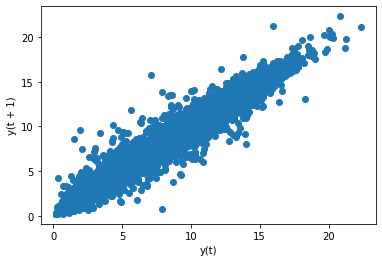

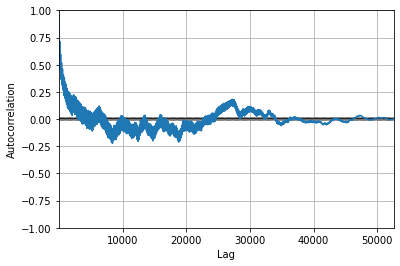

In [187]:
import math
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
# p=series.iloc[:532]
# series.hist()
lag_plot(series)
plt.show()
autocorrelation_plot(series)
plt.show()

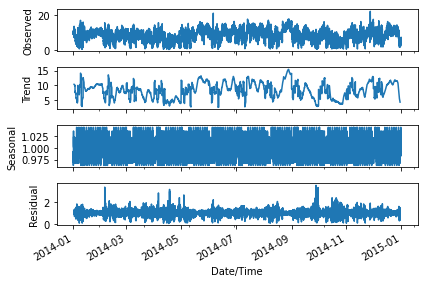

In [192]:
result = seasonal_decompose(series, model='multiplicative', freq=365)
result.plot()
plt.show()

There are methods to automatically decompose a time series.

The statsmodels library provides an implementation of the naive, or classical, decomposition method in a function called seasonal_decompose(). It requires that you specify whether the model is additive or multiplicative.

Both will produce a result and you must be careful to be critical when interpreting the result. A review of a plot of the time series and some summary statistics can often be a good start to get an idea of whether your time series problem looks additive or multiplicative.

The seasonal_decompose() function returns a result object. The result object contains arrays to access four pieces of data from the decomposition.

For example, the snippet below shows how to decompose a series into trend, seasonal, and residual components assuming an additive model.

In [51]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X=values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)

predicted=7.176356, expected=6.737222
predicted=6.811714, expected=6.694444
predicted=6.878066, expected=6.598889
predicted=6.755125, expected=6.661111
predicted=6.765391, expected=6.660000
predicted=6.810243, expected=7.762778
predicted=8.012787, expected=8.047778
predicted=8.164180, expected=7.929444
predicted=7.956761, expected=7.042222
predicted=6.862429, expected=7.158333
predicted=7.154042, expected=6.507778
predicted=6.417499, expected=8.143333
predicted=8.412216, expected=8.960556
predicted=9.002716, expected=8.758889
predicted=8.657189, expected=8.838333
predicted=8.748687, expected=8.045556
predicted=7.858604, expected=8.400000
predicted=8.501345, expected=8.302222
predicted=8.332386, expected=7.736667
predicted=7.569455, expected=8.242222
predicted=8.263061, expected=7.853889
predicted=7.666151, expected=7.773889
predicted=7.783070, expected=8.105556
predicted=8.211246, expected=8.104444
predicted=8.107841, expected=8.090000
predicted=8.163199, expected=7.928889
predicted=7.

predicted=12.257345, expected=10.732222
predicted=10.420402, expected=11.061667
predicted=11.116493, expected=11.462222
predicted=11.426111, expected=12.026111
predicted=12.075080, expected=13.032222
predicted=13.015277, expected=13.100556
predicted=12.866825, expected=12.211111
predicted=11.970821, expected=11.560556
predicted=11.418890, expected=11.637222
predicted=11.609864, expected=11.525556
predicted=11.590722, expected=11.792778
predicted=11.799622, expected=11.166667
predicted=10.979168, expected=10.562222
predicted=10.441273, expected=10.233889
predicted=10.218213, expected=10.229444
predicted=10.342268, expected=9.767222
predicted=9.852838, expected=8.728889
predicted=8.675932, expected=9.200000
predicted=9.319497, expected=8.976667
predicted=9.024073, expected=9.077222
predicted=9.241691, expected=9.355000
predicted=9.510556, expected=9.097222
predicted=9.114048, expected=8.746111
predicted=8.798666, expected=7.978333
predicted=7.936239, expected=8.914444
predicted=9.123250,

predicted=14.739834, expected=14.729073
predicted=14.733411, expected=14.722653
predicted=14.726989, expected=14.716233
predicted=14.720566, expected=14.709813
predicted=14.714144, expected=14.703393
predicted=14.707721, expected=14.696973
predicted=14.701299, expected=14.690553
predicted=14.694876, expected=14.684134
predicted=14.688454, expected=14.677714
predicted=14.682031, expected=14.671294
predicted=14.675609, expected=14.664874
predicted=14.669186, expected=14.658454
predicted=14.662764, expected=14.652034
predicted=14.656341, expected=14.645614
predicted=14.649919, expected=14.639194
predicted=14.643496, expected=14.632775
predicted=14.637074, expected=14.626355
predicted=14.630651, expected=14.619935
predicted=14.624229, expected=14.613515
predicted=14.617806, expected=14.607095
predicted=14.611384, expected=14.600675
predicted=14.604961, expected=14.594255
predicted=14.598539, expected=14.587836
predicted=14.592116, expected=14.581416
predicted=14.585694, expected=14.574996


predicted=13.423244, expected=13.412999
predicted=13.416822, expected=13.406580
predicted=13.410400, expected=13.400160
predicted=13.403977, expected=13.393740
predicted=13.397555, expected=13.387320
predicted=13.391133, expected=13.380900
predicted=13.384711, expected=13.374480
predicted=13.378288, expected=13.368060
predicted=13.371866, expected=13.361640
predicted=13.365444, expected=13.355221
predicted=13.359022, expected=13.348801
predicted=13.352599, expected=13.342381
predicted=13.346177, expected=13.335961
predicted=13.339755, expected=13.329541
predicted=13.333333, expected=13.323121
predicted=13.326910, expected=13.316701
predicted=13.320488, expected=13.310281
predicted=13.314066, expected=13.303862
predicted=13.307644, expected=13.297442
predicted=13.301221, expected=13.291022
predicted=13.294799, expected=13.284602
predicted=13.288377, expected=13.278182
predicted=13.281955, expected=13.271762
predicted=13.275532, expected=13.265342
predicted=13.269110, expected=13.258922


predicted=12.106702, expected=12.096926
predicted=12.100280, expected=12.090506
predicted=12.093858, expected=12.084086
predicted=12.087436, expected=12.077666
predicted=12.081014, expected=12.071247
predicted=12.074592, expected=12.064827
predicted=12.068170, expected=12.058407
predicted=12.061748, expected=12.051987
predicted=12.055325, expected=12.045567
predicted=12.048903, expected=12.039147
predicted=12.042481, expected=12.032727
predicted=12.036059, expected=12.026307
predicted=12.029637, expected=12.019888
predicted=12.023215, expected=12.013468
predicted=12.016793, expected=12.007048
predicted=12.010371, expected=12.000628
predicted=12.003949, expected=11.994208
predicted=11.997527, expected=11.987788
predicted=11.991105, expected=11.981368
predicted=11.984683, expected=11.974949
predicted=11.978261, expected=11.968529
predicted=11.971839, expected=11.962109
predicted=11.965417, expected=11.955689
predicted=11.958995, expected=11.949269
predicted=11.952573, expected=11.942849


predicted=2.632007, expected=2.292222
predicted=2.185980, expected=2.458333
predicted=2.451333, expected=3.466667
predicted=3.637397, expected=3.363889
predicted=3.422265, expected=3.954444
predicted=4.100588, expected=4.033889
predicted=4.056850, expected=4.160000
predicted=4.182180, expected=4.332222
predicted=4.335725, expected=3.841111
predicted=3.766168, expected=4.085556
predicted=4.082866, expected=3.880556
predicted=3.768060, expected=4.032222
predicted=3.971669, expected=3.523333
predicted=3.425269, expected=1.920556
predicted=1.664243, expected=4.862222
predicted=5.340912, expected=7.663889
predicted=7.984925, expected=8.570000
predicted=8.637775, expected=7.086111
predicted=6.756365, expected=11.719444
predicted=12.196671, expected=11.970556
predicted=11.707450, expected=11.991111
predicted=11.955874, expected=12.127778
predicted=11.803679, expected=12.144444
predicted=11.717133, expected=10.481111
predicted=9.847289, expected=10.311111
predicted=10.095250, expected=10.45888

predicted=13.364583, expected=13.350429
predicted=13.354731, expected=13.340580
predicted=13.344879, expected=13.330730
predicted=13.335027, expected=13.320881
predicted=13.325175, expected=13.311032
predicted=13.315323, expected=13.301183
predicted=13.305470, expected=13.291333
predicted=13.295618, expected=13.281484
predicted=13.285766, expected=13.271635
predicted=13.275914, expected=13.261785
predicted=13.266062, expected=13.251936
predicted=13.256209, expected=13.242087
predicted=13.246357, expected=13.232238
predicted=13.236505, expected=13.222388
predicted=13.226653, expected=13.212539
predicted=13.216801, expected=13.202690
predicted=13.206949, expected=13.192840
predicted=13.197097, expected=13.182991
predicted=13.187244, expected=13.173142
predicted=13.177392, expected=13.163293
predicted=13.167540, expected=13.153443
predicted=13.157688, expected=13.143594
predicted=13.147836, expected=13.133745
predicted=13.137984, expected=13.123895
predicted=13.128131, expected=13.114046


predicted=11.344910, expected=11.331326
predicted=11.335059, expected=11.321476
predicted=11.325207, expected=11.311627
predicted=11.315355, expected=11.301778
predicted=11.305503, expected=11.291928
predicted=11.295651, expected=11.282079
predicted=11.285799, expected=11.272230
predicted=11.275947, expected=11.262381
predicted=11.266095, expected=11.252531
predicted=11.256243, expected=11.242682
predicted=11.246391, expected=11.232833
predicted=11.236539, expected=11.222983
predicted=11.226687, expected=11.213134
predicted=11.216835, expected=11.203285
predicted=11.206983, expected=11.193436
predicted=11.197131, expected=11.183586
predicted=11.187279, expected=11.173737
predicted=11.177427, expected=11.163888
predicted=11.167576, expected=11.154039
predicted=11.157724, expected=11.144189
predicted=11.147872, expected=11.134340
predicted=11.138020, expected=11.124491
predicted=11.128168, expected=11.114641
predicted=11.118316, expected=11.104792
predicted=11.108464, expected=11.094943


predicted=9.655991, expected=9.079444
predicted=8.978370, expected=7.746667
predicted=7.562323, expected=7.551111
predicted=7.594520, expected=7.457778
predicted=7.485417, expected=7.273333
predicted=7.298836, expected=7.761667
predicted=7.903783, expected=7.669444
predicted=7.659010, expected=6.861111
predicted=6.851397, expected=7.362778
predicted=7.597967, expected=7.759444
predicted=7.898902, expected=8.780556
predicted=9.044505, expected=9.598889
predicted=9.698369, expected=9.702222
predicted=9.619322, expected=9.793333
predicted=9.749904, expected=9.736111
predicted=9.658726, expected=9.485556
predicted=9.390096, expected=9.257222
predicted=9.188760, expected=8.108889
predicted=7.803042, expected=8.733889
predicted=8.761131, expected=9.125000
predicted=9.083182, expected=11.627778
predicted=11.973147, expected=10.895000
predicted=10.701646, expected=9.332222
predicted=9.096458, expected=8.733333
predicted=8.659865, expected=8.883889
predicted=8.966986, expected=9.256111
predicte

In [193]:
rmse= math.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
mae, rmse

(0.35898199498724587, 0.8165765323003833)

In [61]:
X.shape

(5526, 1)

In [ ]:
print('Test MSE: %.3f' % error)
# plot
# plt.plot(test)
# plt.plot(predictions, color='blue')
# plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(test, predictions)